#    Heart Disease Prediction

## Project Member's Name :

  #####  1. Logeshwary Selvaraj 
  
  #####  2. Kishore Kumar S 
  
  #####  3. Bharath K 
  
  #####  4. Nawaz Hussain Z 


## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

## 2. Importing And Understanding Our Dataset

In [2]:
df_val = pd.read_csv('values.csv')

df_val

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [3]:
df_lab = pd.read_csv('labels.csv')

df_lab

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


### Merging the data :

In [4]:
df = pd.concat([df_val,df_lab],axis=1)

In [5]:
df.head(5)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0z64un,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,ryoo3j,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,yt1s1x,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,l2xjde,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,oyt4ek,0


In [6]:
df.tail(5)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,5qfar3,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,2s2b1f,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,nsd00i,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0xw93k,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,2nx10r,0


### Shape of dataset

In [7]:
df.shape

(180, 16)

### Finding out duplicates :

In [8]:
df.loc[df.duplicated()]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present


### Finding out any duplicates in the subset :

In [9]:
df.loc[df.duplicated(subset=['patient_id'])]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present


### Droping the unwanted data from the dataset :

In [10]:
df.drop(['patient_id'],axis=1,inplace=True)

In [11]:
df.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

### Renaming the features to a proper name for better understanding :

In [12]:
df = df.rename(columns={'slope_of_peak_exercise_st_segment':'ST_slop','thal':'Thal','resting_blood_pressure':'Rest_BP',
                       'chest_pain_type':'CP','num_major_vessels':'Major_Vessels','fasting_blood_sugar_gt_120_mg_per_dl':'Fasting_Blood_Sugar',
                        'resting_ekg_results':'Rest_ECG','serum_cholesterol_mg_per_dl':'Chol',
                        'oldpeak_eq_st_depression':'Old_Peak','sex':'Sex','age':'Age','max_heart_rate_achieved':'Max_HR',
                       'exercise_induced_angina':'Ex_Ang','heart_disease_present':'Heart_Disease'})

In [13]:
df.head(5)

,ST_slop,Thal,Rest_BP,CP,Major_Vessels,Fasting_Blood_Sugar,Rest_ECG,Chol,Old_Peak,Sex,Age,Max_HR,Ex_Ang,Heart_Disease
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ST_slop              180 non-null    int64  
 1   Thal                 180 non-null    object 
 2   Rest_BP              180 non-null    int64  
 3   CP                   180 non-null    int64  
 4   Major_Vessels        180 non-null    int64  
 5   Fasting_Blood_Sugar  180 non-null    int64  
 6   Rest_ECG             180 non-null    int64  
 7   Chol                 180 non-null    int64  
 8   Old_Peak             180 non-null    float64
 9   Sex                  180 non-null    int64  
 10  Age                  180 non-null    int64  
 11  Max_HR               180 non-null    int64  
 12  Ex_Ang               180 non-null    int64  
 13  Heart_Disease        180 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 19.8+ KB


### Checking if the dataset has any missing values :

In [15]:
df.isnull().sum()

ST_slop                0
Thal                   0
Rest_BP                0
CP                     0
Major_Vessels          0
Fasting_Blood_Sugar    0
Rest_ECG               0
Chol                   0
Old_Peak               0
Sex                    0
Age                    0
Max_HR                 0
Ex_Ang                 0
Heart_Disease          0
dtype: int64

### Statistical Measure of the data :

In [16]:
df.describe()

,ST_slop,Rest_BP,CP,Major_Vessels,Fasting_Blood_Sugar,Rest_ECG,Chol,Old_Peak,Sex,Age,Max_HR,Ex_Ang,Heart_Disease
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


### Distribution of the Heart_Disease (Target Variable) :

##### Checking whether the data is Balanced :

In [17]:
df['Heart_Disease'].value_counts()

0    100
1     80
Name: Heart_Disease, dtype: int64

### NOTE :
#### > 0 - No Heart Disease Present (Healthy Heart)
#### > 1 - Heart Disease Present (Defective Heart)

In [18]:
df['ST_slop'].value_counts()

1    93
2    75
3    12
Name: ST_slop, dtype: int64

In [19]:
df['Rest_ECG'].value_counts()

2    94
0    85
1     1
Name: Rest_ECG, dtype: int64

In [20]:
df.CP.unique()

array([2, 3, 4, 1], dtype=int64)

In [21]:
df.Major_Vessels.unique()

array([0, 3, 2, 1], dtype=int64)

In [22]:
df.Heart_Disease.unique()

array([0, 1], dtype=int64)

In [23]:
df.Sex.unique()

array([1, 0], dtype=int64)

In [24]:
df.Ex_Ang.unique()

array([0, 1], dtype=int64)

In [25]:
df.Fasting_Blood_Sugar.unique()

array([0, 1], dtype=int64)

### Finding correlation :

In [129]:
print(df.corr()["Heart_Disease"].abs().sort_values(ascending=False))

Heart_Disease          1.000000
Ex_Ang                 0.448647
Major_Vessels          0.421519
CP                     0.412829
Old_Peak               0.382930
Max_HR                 0.375352
ST_slop                0.344224
Sex                    0.335421
Rest_ECG               0.145933
Age                    0.138255
Chol                   0.079775
Rest_BP                0.078506
Fasting_Blood_Sugar    0.003379
Name: Heart_Disease, dtype: float64


<Axes: >

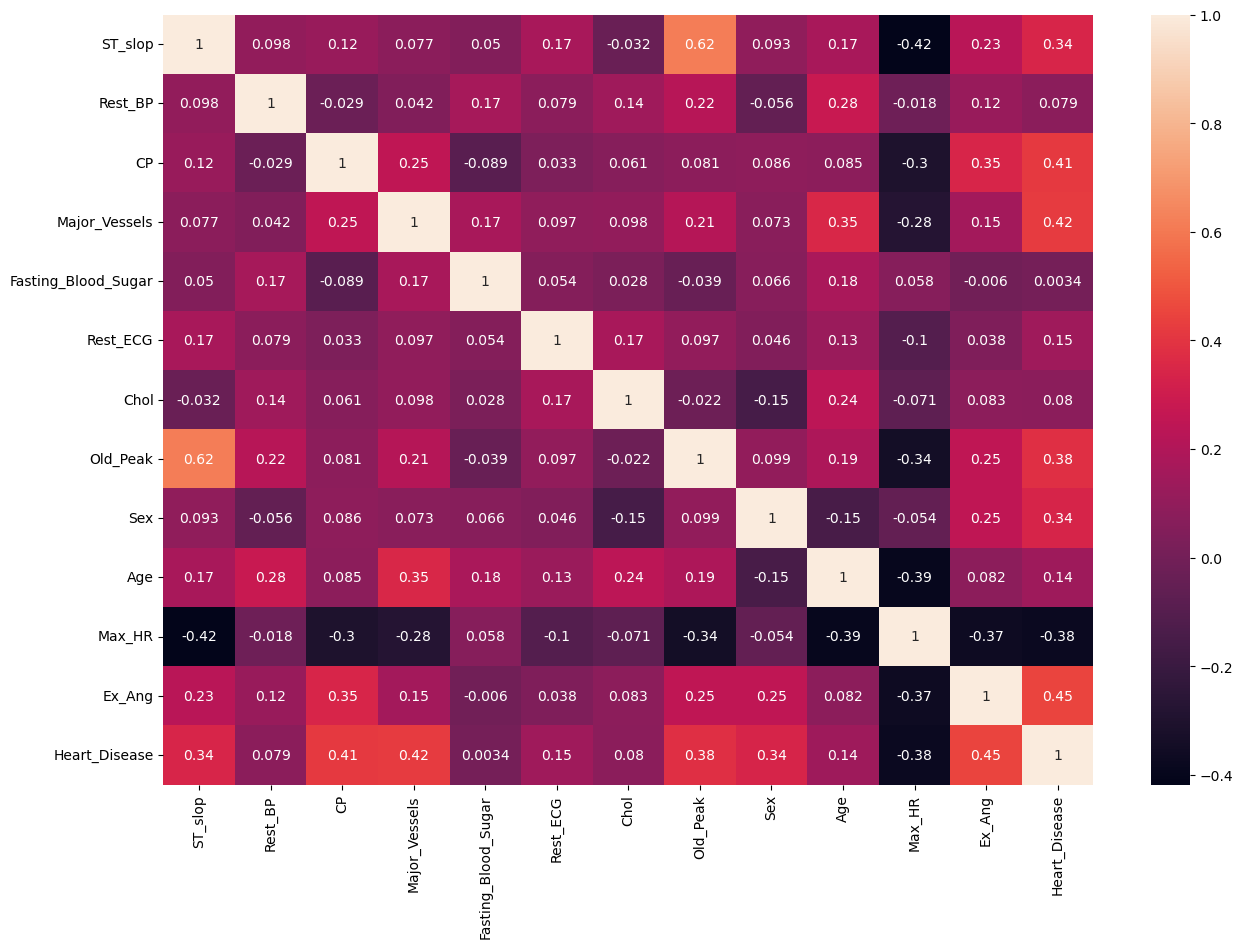

In [128]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

# 3. Exploratory Data Analysis (EDA)

### ~  Analysing the Heart_Disease (Target Variable) :

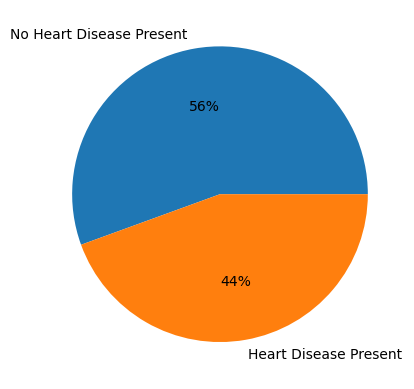

In [26]:
ax = df['Heart_Disease'].value_counts().plot(kind='pie',autopct='%1.0f%%',
                                             labels=['No Heart Disease Present ','Heart Disease Present'])
ax.set_ylabel('')
plt.show()

### ~  Analysing the Sex feature distribution :

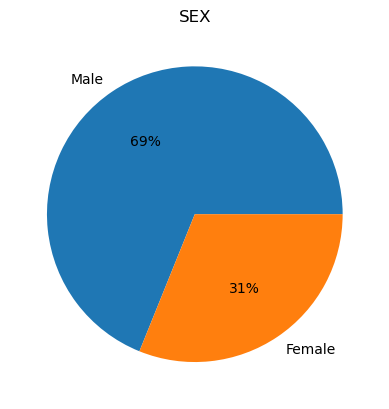

In [27]:
ax = df['Sex'].value_counts().plot(kind='pie',autopct='%1.0f%%',labels=['Male','Female'],title='SEX')
ax.set_ylabel('')
plt.show()

### ~ Analysing the Age feature distribution :

<Axes: xlabel='Age', ylabel='Density'>

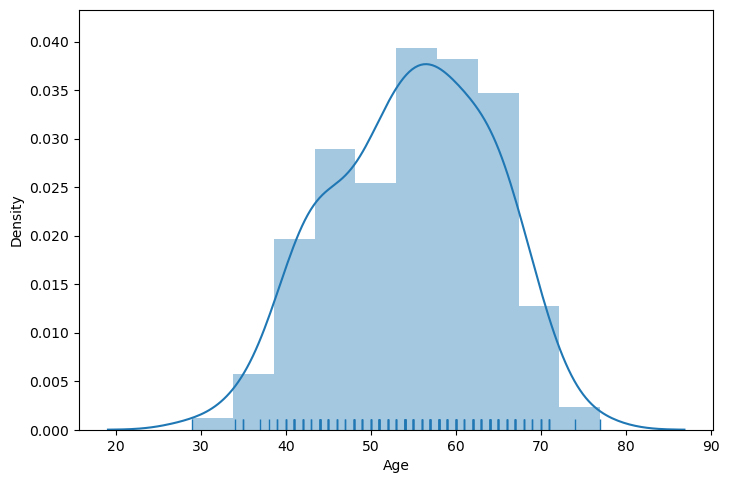

In [28]:
plt.figure(figsize=(18,12))
plt.subplot(222)
sns.distplot(df['Age'],rug=True)

### ~ Creating separate variable for normal and heart patients for better visualization :

In [29]:
df1 = df[df['Heart_Disease']==1]  # heart patients
df0 = df[df['Heart_Disease']==0]  # nornal patients

# Feature Relationships :

### ~ Analyzing The Relationships Between Age and Sex :

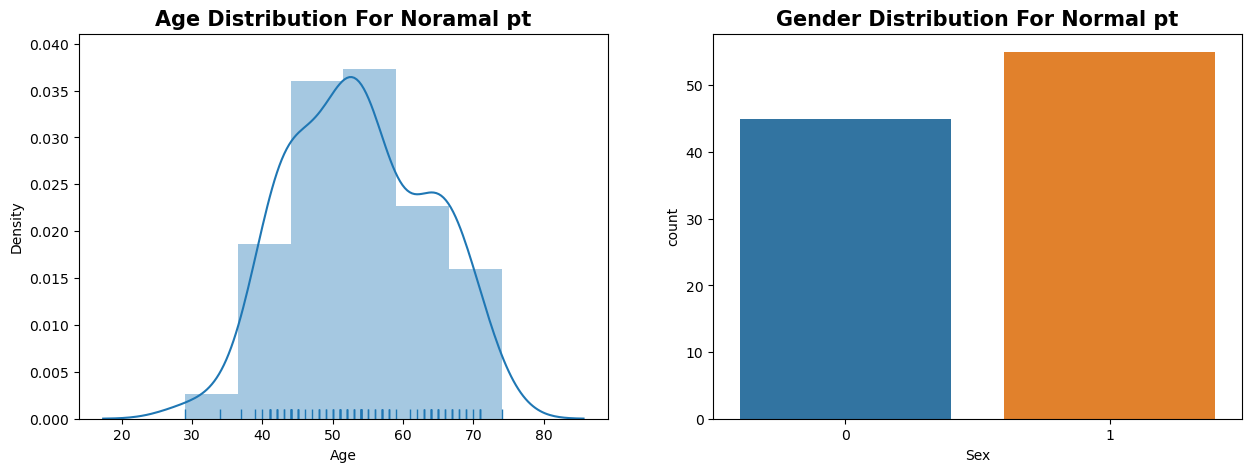

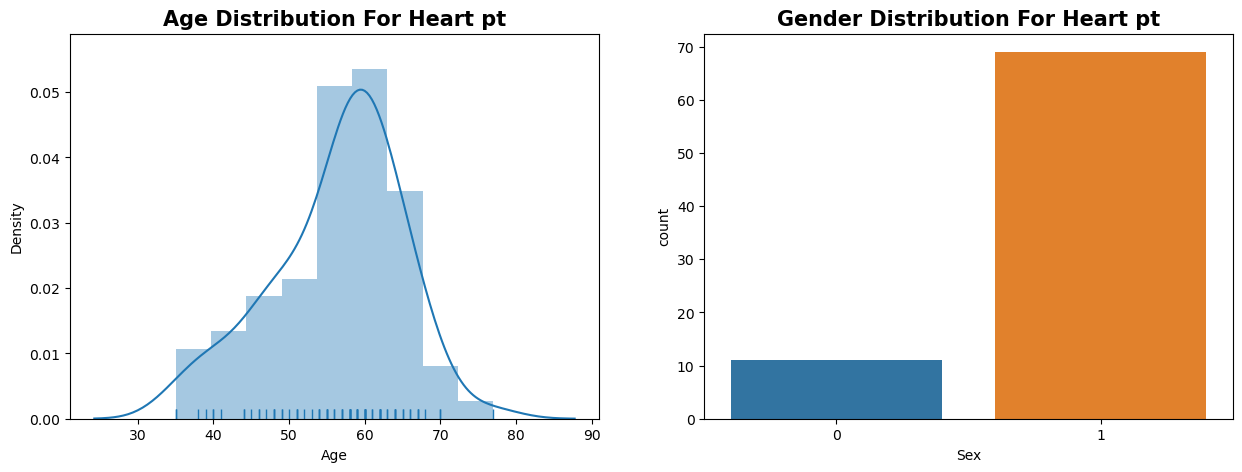

In [30]:
# PLotting for Normal Patients :

plt.figure(figsize=(15,5))
plt.subplot2grid((1,2),(0,0))
sns.distplot(df0['Age'],rug=True)
plt.title('Age Distribution For Noramal pt',fontsize=15,weight='bold')


plt.subplot2grid((1,2),(0,1))
sns.countplot(x=df0['Sex'])
plt.title('Gender Distribution For Normal pt',fontsize=15,weight='bold')


# Plotting for Heart Patients :

plt.figure(figsize=(15,5))
plt.subplot2grid((1,2),(0,0))
sns.distplot(df1['Age'],rug=True)
plt.title('Age Distribution For Heart pt',fontsize=15,weight='bold')


plt.subplot2grid((1,2),(0,1))
sns.countplot(x=df1['Sex'])
plt.title('Gender Distribution For Heart pt',fontsize=15,weight='bold')

plt.show()

### ~  Analyzing The ChestPain Feature :

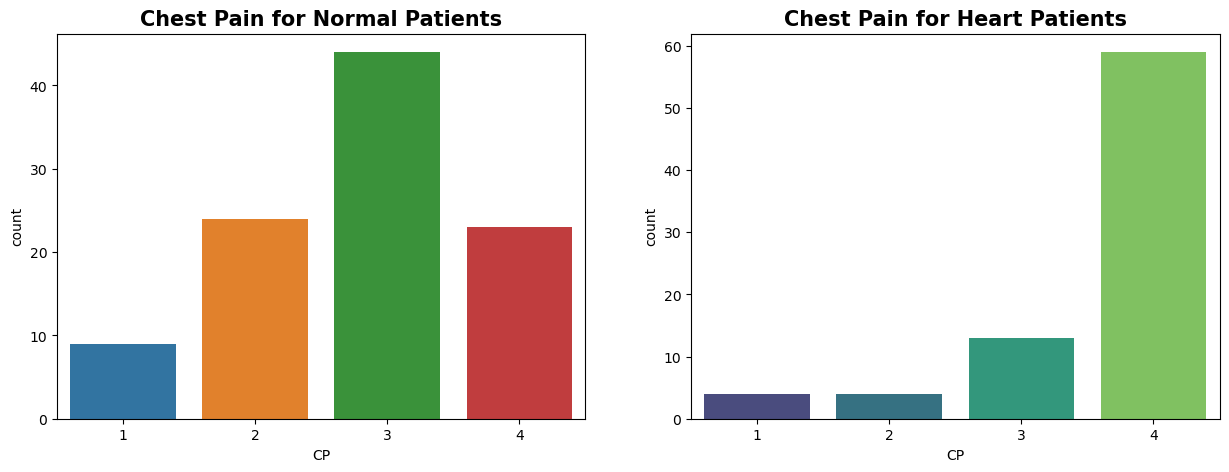

In [31]:
# Ploting for Normal Patients :

plt.figure(figsize=(15,5))
plt.subplot2grid((1,2),(0,0))
sns.countplot(x=df0['CP'])
plt.title("Chest Pain for Normal Patients", fontsize=15,weight='bold')


# Ploting for Heart Patients :

plt.subplot2grid((1,2),(0,1))
sns.countplot(x=df1['CP'],palette='viridis')
plt.title("Chest Pain for Heart Patients", fontsize=15,weight='bold')

plt.show()

### ~  Analyzing The Rest ECG Feature :

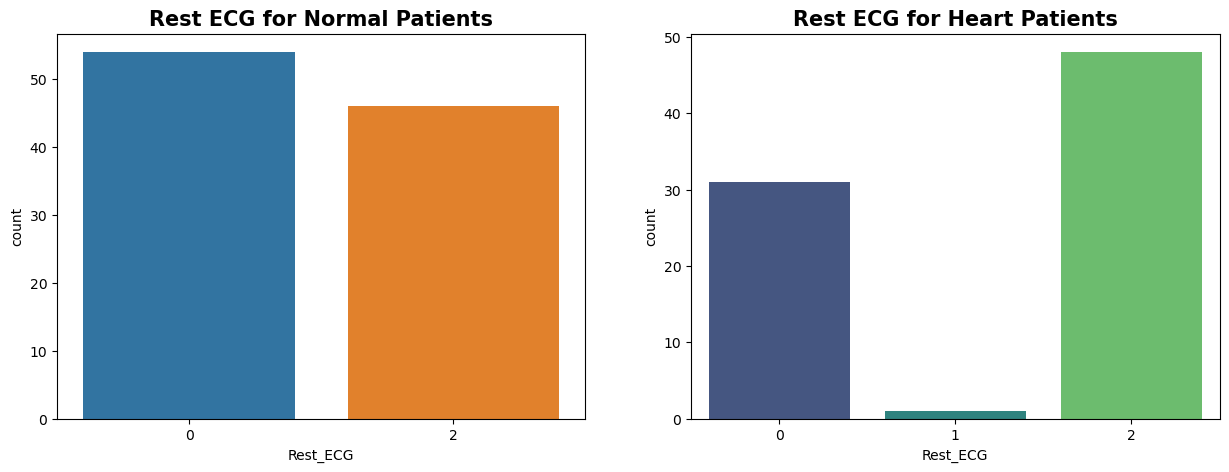

In [32]:
# Plotting Rest ECG for Normal Patients :

plt.figure(figsize=(15,5))
plt.subplot2grid((1,2),(0,0))
sns.countplot(x=df0['Rest_ECG'])
plt.title("Rest ECG for Normal Patients", fontsize=15,weight='bold')


# Plotting Rest ECG for Heart Patients :

plt.subplot2grid((1,2),(0,1))
sns.countplot(x=df1['Rest_ECG'], palette='viridis')
plt.title("Rest ECG for Heart Patients", fontsize=15,weight='bold')

plt.show()

### ~  Analyzing The ST_slop Feature :

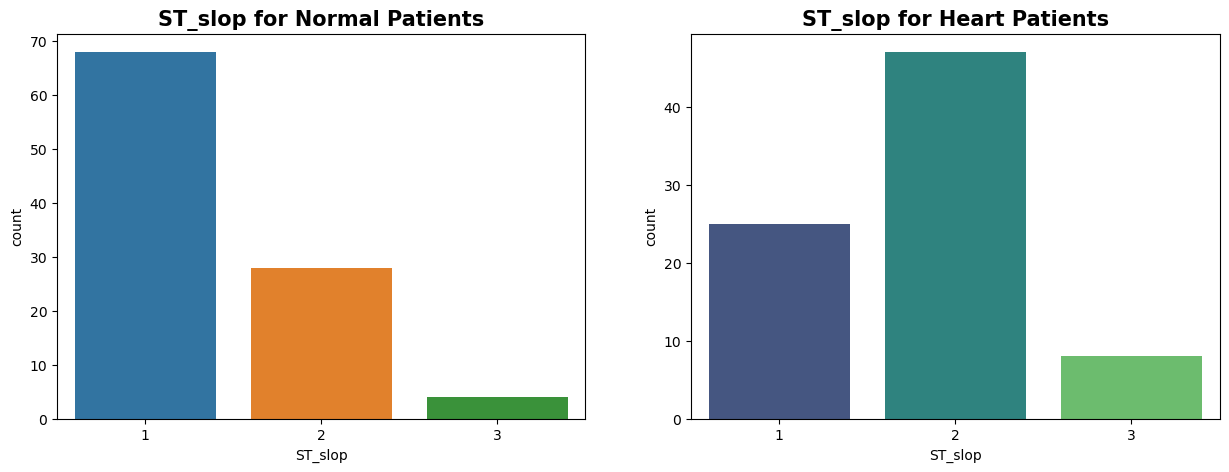

In [33]:
# Plotting ST_slop for Normal Patients :

plt.figure(figsize=(15,5))
plt.subplot2grid((1,2),(0,0))
sns.countplot(x=df0['ST_slop'])
plt.title("ST_slop for Normal Patients", fontsize=15,weight='bold')


# Plotting ST_slop for Heart Patients :

plt.subplot2grid((1,2),(0,1))
sns.countplot(x=df1['ST_slop'], palette='viridis')
plt.title("ST_slop for Heart Patients", fontsize=15,weight='bold')

plt.show()

### ~ Analyzing The Ex_Ang Feature :

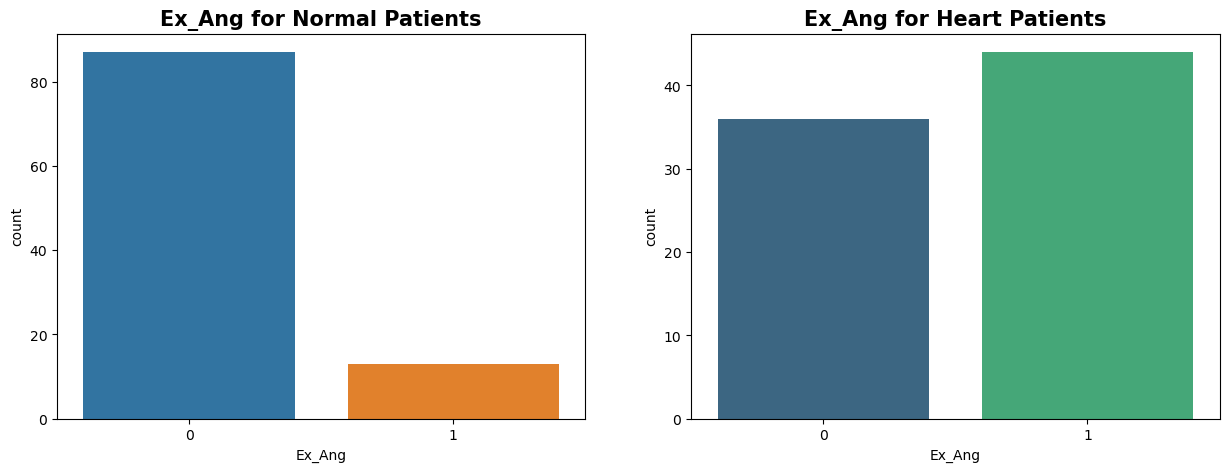

In [34]:
# Plotting Ex_Ang for Normal Patients :

plt.figure(figsize=(15,5))
plt.subplot2grid((1,2),(0,0))
sns.countplot(x=df0['Ex_Ang'])
plt.title("Ex_Ang for Normal Patients", fontsize=15,weight='bold')


# Plotting Ex_Ang for Heart Patients :

plt.subplot2grid((1,2),(0,1))
sns.countplot(x=df1['Ex_Ang'], palette='viridis')
plt.title("Ex_Ang for Heart Patients", fontsize=15,weight='bold')

plt.show()

### ~  Analyzing The Thal Feature :

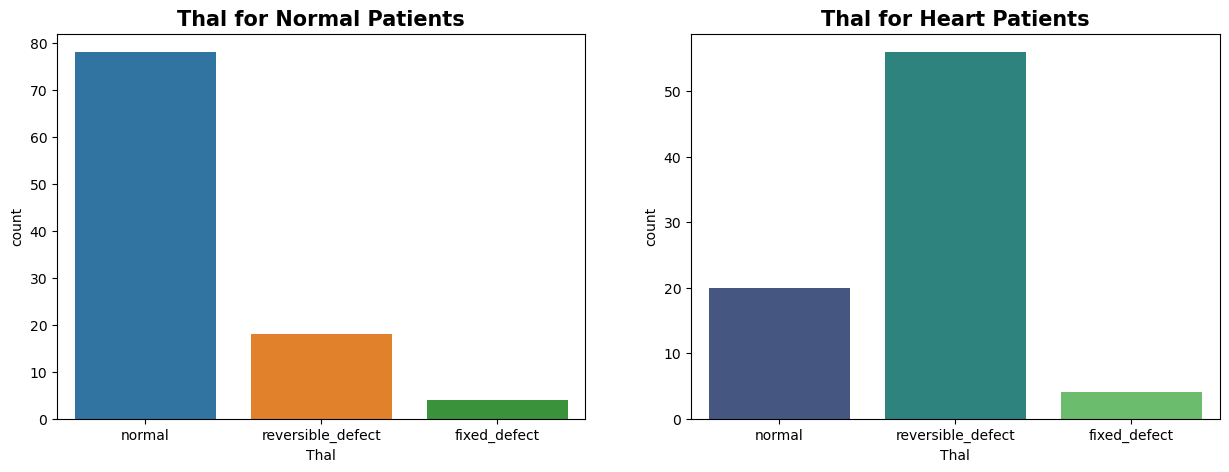

In [35]:
# Plotting Thal for Normal Patients :

plt.figure(figsize=(15,5))
plt.subplot2grid((1,2),(0,0))
sns.countplot(x=df0['Thal'])
plt.title("Thal for Normal Patients", fontsize=15,weight='bold')


# Plotting Thal for Heart Patients :

plt.subplot2grid((1,2),(0,1))
sns.countplot(x=df1['Thal'], palette='viridis')
plt.title("Thal for Heart Patients", fontsize=15,weight='bold')

plt.show()

### ~  Analyzing The Major Vessels Feature :

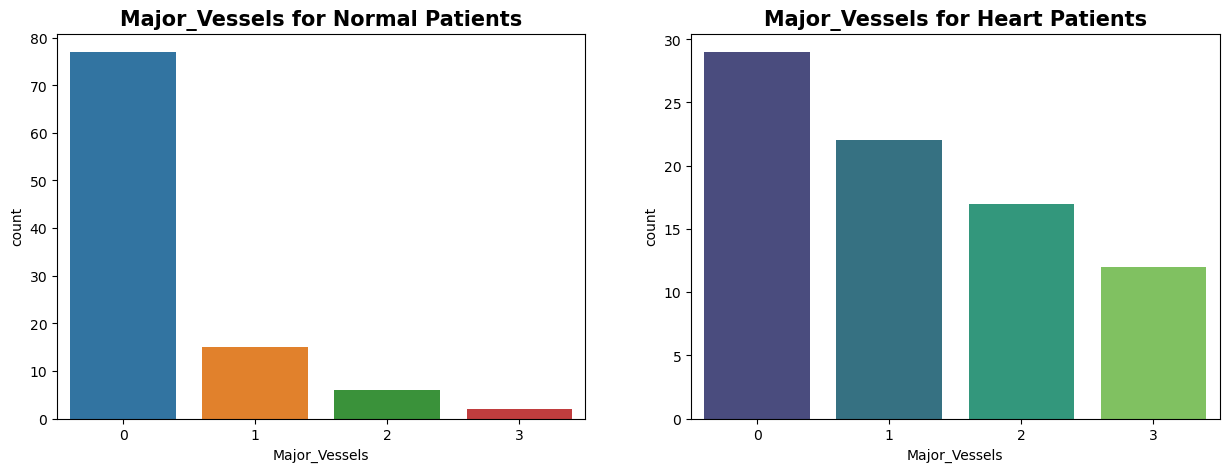

In [36]:
# Plotting Major_Vessels for Normal Patients :

plt.figure(figsize=(15,5))
plt.subplot2grid((1,2),(0,0))
sns.countplot(x=df0['Major_Vessels'])
plt.title("Major_Vessels for Normal Patients", fontsize=15,weight='bold')


# Plotting Major_Vessels for Heart Patients :

plt.subplot2grid((1,2),(0,1))
sns.countplot(x=df1['Major_Vessels'], palette='viridis')
plt.title("Major_Vessels for Heart Patients", fontsize=15,weight='bold')

plt.show()

### ~  Analyzing The Fasting Blood Sugar Feature :

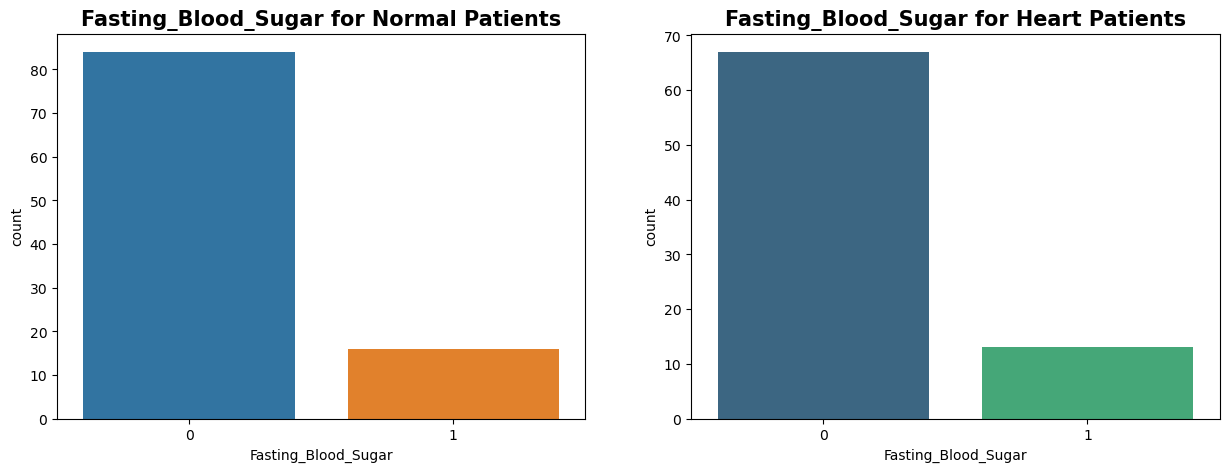

In [37]:
# Plotting Fasting_Blood_Sugar for Normal Patients :

plt.figure(figsize=(15,5))
plt.subplot2grid((1,2),(0,0))
sns.countplot(x=df0['Fasting_Blood_Sugar'])
plt.title('Fasting_Blood_Sugar for Normal Patients', fontsize=15,weight='bold')


# Plotting Fasting_Blood_Sugar for Heart Patients :

plt.subplot2grid((1,2),(0,1))
sns.countplot(x=df1['Fasting_Blood_Sugar'], palette='viridis')
plt.title('Fasting_Blood_Sugar for Heart Patients', fontsize=15,weight='bold')

plt.show()

## ~  Analysis Of Numeric Feature :

In [38]:
'Rest_BP','Chol','Old_Peak','Age','Max_HR'

('Rest_BP', 'Chol', 'Old_Peak', 'Age', 'Max_HR')

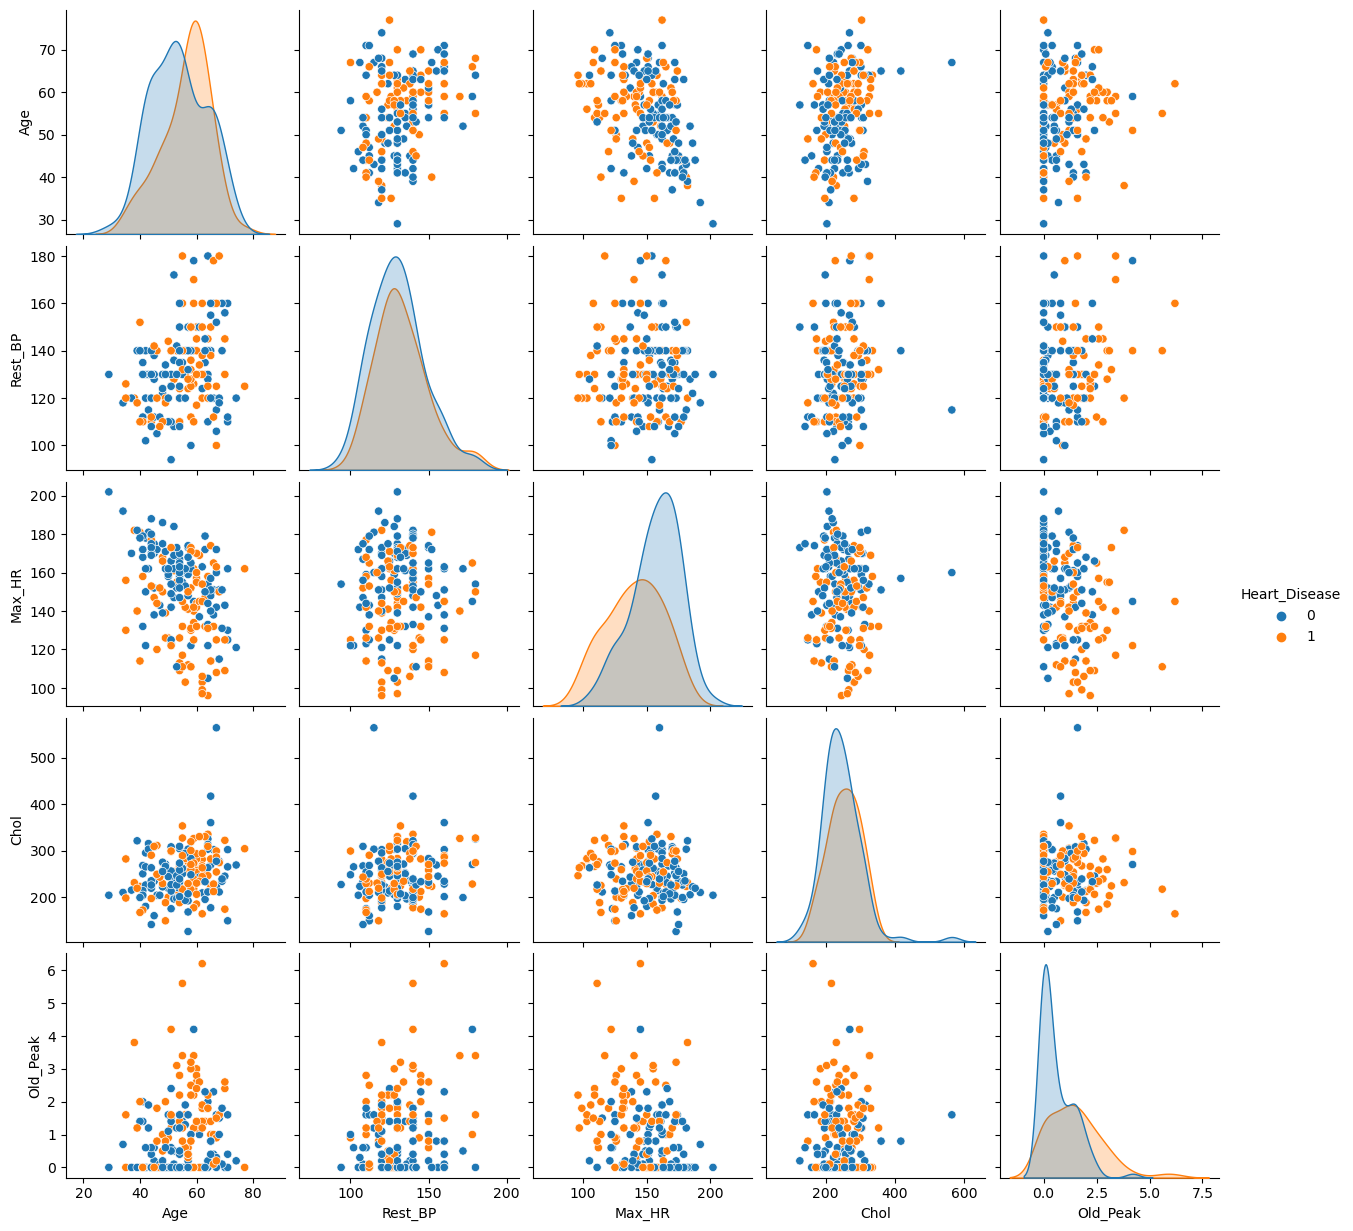

In [39]:
sns.pairplot(df, hue = 'Heart_Disease', vars = ['Age', 'Rest_BP','Max_HR', 'Chol','Old_Peak'] )

<Axes: xlabel='Chol', ylabel='Age'>

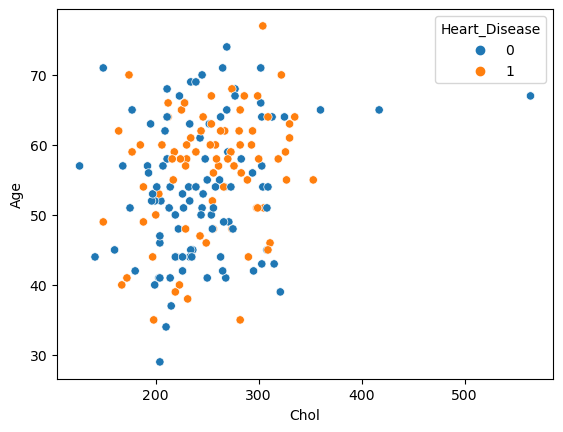

In [40]:
sns.scatterplot(df,x='Chol',y='Age',hue='Heart_Disease')

<Axes: xlabel='Old_Peak', ylabel='Age'>

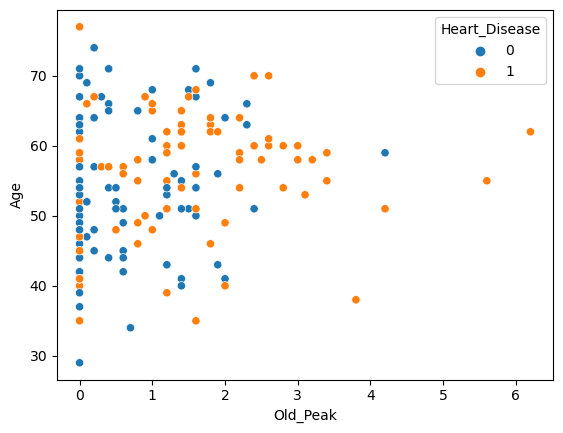

In [41]:
sns.scatterplot(df,x='Old_Peak',y='Age',hue='Heart_Disease')

### ~  Visualising The Numeric Variable For Any Outliers :

In [42]:
df_numeric = df[['Age', 'Rest_BP','Max_HR', 'Chol','Old_Peak']]
df_numeric.head(5)

,Age,Rest_BP,Max_HR,Chol,Old_Peak
0,45,128,170,308,0.0
1,54,110,158,214,1.6
2,77,125,162,304,0.0
3,40,152,181,223,0.0
4,59,178,145,270,4.2


<Axes: xlabel='Old_Peak'>

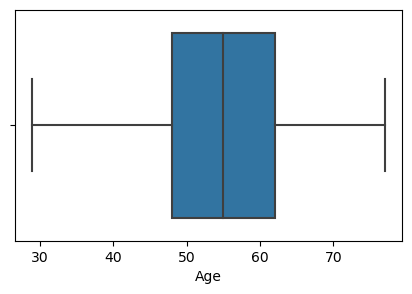

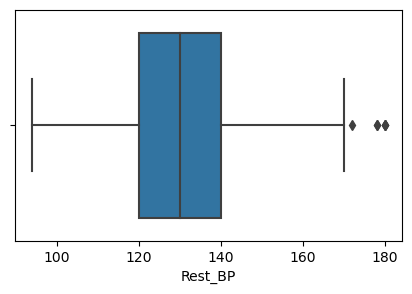

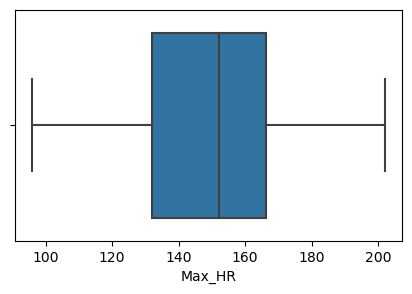

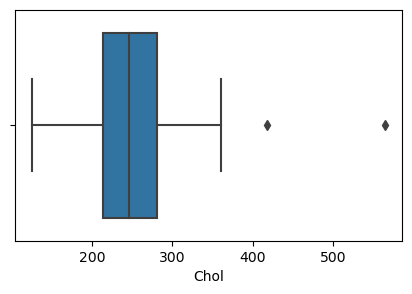

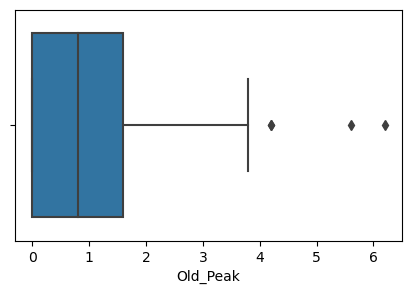

In [43]:
plt.figure(figsize=(5,3))
sns.boxplot(df,x='Age')

plt.figure(figsize=(5,3))
sns.boxplot(df,x='Rest_BP')

plt.figure(figsize=(5,3))
sns.boxplot(df,x='Max_HR')

plt.figure(figsize=(5,3))
sns.boxplot(df,x='Chol')

plt.figure(figsize=(5,3))
sns.boxplot(df,x='Old_Peak')

# ~ Removing Outliers Using Z-Score :

##### We will be taking the values inside the range of -3 to +3 standard deviation

### Finding out the Limits for Rest_Bp :

In [44]:
upper_limit = df['Rest_BP'].mean()+3*df['Rest_BP'].std()
lower_limit = df['Rest_BP'].mean()-3*df['Rest_BP'].std()
print(upper_limit)
print(lower_limit)

182.3424411745603
80.27978104766191


### Finding out the Outliers in Rest_BP :

In [45]:
df.loc[(df['Rest_BP']>upper_limit) | (df['Rest_BP']<lower_limit)]

,ST_slop,Thal,Rest_BP,CP,Major_Vessels,Fasting_Blood_Sugar,Rest_ECG,Chol,Old_Peak,Sex,Age,Max_HR,Ex_Ang,Heart_Disease


### Finding out the Limits for Chol :

In [46]:
upper_limit1 = df['Chol'].mean()+3*df['Chol'].std()
lower_limit1 = df['Chol'].mean()-3*df['Chol'].std()
print(upper_limit1)
print(lower_limit1)

407.3650174825905
91.05720473963177


### Finding out the Outliers in Chol :

In [47]:
df.loc[(df['Chol']>upper_limit1) | (df['Chol']<lower_limit1)]

,ST_slop,Thal,Rest_BP,CP,Major_Vessels,Fasting_Blood_Sugar,Rest_ECG,Chol,Old_Peak,Sex,Age,Max_HR,Ex_Ang,Heart_Disease
43,1,normal,140,3,1,1,2,417,0.8,0,65,157,0,0
60,2,reversible_defect,115,3,0,0,2,564,1.6,0,67,160,0,0


### Removing the outliers in Chol :

In [48]:
ol = df.loc[(df['Chol']<upper_limit1) & (df['Chol']>lower_limit1)]
ol.shape

(178, 14)

### Finding out the Limits for Old_Peak :

In [49]:
upper_limit2 = ol['Old_Peak'].mean()+3*ol['Old_Peak'].std()
lower_limit2= ol['Old_Peak'].mean()-3*ol['Old_Peak'].std()
print(upper_limit2)
print(lower_limit2)

4.387933782555898
-2.3722034454772456


### Finding out the Outliers in Old_Peak :

In [50]:
ol.loc[(ol['Old_Peak']>upper_limit2) | (ol['Old_Peak']<lower_limit2)]

,ST_slop,Thal,Rest_BP,CP,Major_Vessels,Fasting_Blood_Sugar,Rest_ECG,Chol,Old_Peak,Sex,Age,Max_HR,Ex_Ang,Heart_Disease
140,3,reversible_defect,140,4,0,0,0,217,5.6,1,55,111,1,1
162,3,reversible_defect,160,4,3,0,2,164,6.2,0,62,145,0,1


### Removing the outliers in Old_Peak :

In [51]:
df1 = ol.loc[(ol['Old_Peak']<upper_limit2) & (ol['Old_Peak']>lower_limit2)]
df1.shape

(176, 14)

## Getting Dummies For The Categorical Features

In [52]:
df1.columns

Index(['ST_slop', 'Thal', 'Rest_BP', 'CP', 'Major_Vessels',
       'Fasting_Blood_Sugar', 'Rest_ECG', 'Chol', 'Old_Peak', 'Sex', 'Age',
       'Max_HR', 'Ex_Ang', 'Heart_Disease'],
      dtype='object')

In [53]:
Categorical = ['ST_slop','Thal','CP','Major_Vessels','Fasting_Blood_Sugar','Rest_ECG','Sex','Ex_Ang']

['ST_slop', 'Thal', 'CP', 'Major_Vessels', 'Fasting_Blood_Sugar', 'Rest_ECG', 'Sex', 'Ex_Ang']


In [54]:
final_df = pd.get_dummies(df1,columns=['ST_slop','Thal','CP','Rest_ECG'],drop_first=True)
final_df.head(5)

,Rest_BP,Major_Vessels,Fasting_Blood_Sugar,Chol,Old_Peak,Sex,Age,Max_HR,Ex_Ang,Heart_Disease,ST_slop_2,ST_slop_3,Thal_normal,Thal_reversible_defect,CP_2,CP_3,CP_4,Rest_ECG_1,Rest_ECG_2
0,128,0,0,308,0.0,1,45,170,0,0,0,0,1,0,1,0,0,0,1
1,110,0,0,214,1.6,0,54,158,0,0,1,0,1,0,0,1,0,0,0
2,125,3,0,304,0.0,1,77,162,1,1,0,0,1,0,0,0,1,0,1
3,152,0,0,223,0.0,1,40,181,0,1,0,0,0,1,0,0,1,0,0
4,178,0,0,270,4.2,1,59,145,0,0,0,1,0,1,0,0,0,0,1


In [55]:
final_df.shape

(176, 19)

# 4.Train Test Split

In [56]:
X = final_df.drop('Heart_Disease',axis=1)
Y = final_df['Heart_Disease']

In [57]:
X.head(5)

,Rest_BP,Major_Vessels,Fasting_Blood_Sugar,Chol,Old_Peak,Sex,Age,Max_HR,Ex_Ang,ST_slop_2,ST_slop_3,Thal_normal,Thal_reversible_defect,CP_2,CP_3,CP_4,Rest_ECG_1,Rest_ECG_2
0,128,0,0,308,0.0,1,45,170,0,0,0,1,0,1,0,0,0,1
1,110,0,0,214,1.6,0,54,158,0,1,0,1,0,0,1,0,0,0
2,125,3,0,304,0.0,1,77,162,1,0,0,1,0,0,0,1,0,1
3,152,0,0,223,0.0,1,40,181,0,0,0,0,1,0,0,1,0,0
4,178,0,0,270,4.2,1,59,145,0,0,1,0,1,0,0,0,0,1


In [58]:
Y.head(5)

0    0
1    0
2    1
3    1
4    0
Name: Heart_Disease, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [60]:
print(X.shape, X_train.shape, X_test.shape)

(176, 18) (140, 18) (36, 18)


## Feature Normalization

In [61]:
Continuous = ['Rest_BP','Chol','Old_Peak','Age','Max_HR']

In [62]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [63]:
X_train[Continuous] = std.fit_transform(X_train[Continuous])
X_test[Continuous] = std.transform(X_test[Continuous])

In [64]:
X_train.head(5)

,Rest_BP,Major_Vessels,Fasting_Blood_Sugar,Chol,Old_Peak,Sex,Age,Max_HR,Ex_Ang,ST_slop_2,ST_slop_3,Thal_normal,Thal_reversible_defect,CP_2,CP_3,CP_4,Rest_ECG_1,Rest_ECG_2
16,-0.095221,0,0,-0.292811,-0.378157,0,-1.059318,1.144441,0,1,0,1,0,1,0,0,0,1
167,-0.698431,0,0,0.044862,-0.184230,1,-0.947136,-0.310840,0,0,0,0,1,0,0,1,0,1
40,1.111198,0,1,-0.090207,0.009696,1,0.735593,-0.639452,1,1,0,1,0,0,1,0,0,0
154,-0.095221,1,0,0.360024,0.203623,0,0.847775,-2.517233,0,1,0,0,1,0,1,0,0,0
136,-0.095221,2,1,0.202443,-0.959938,1,-0.722772,-0.029173,1,0,0,0,1,0,0,1,0,1


In [65]:
X_test.head(5)

,Rest_BP,Major_Vessels,Fasting_Blood_Sugar,Chol,Old_Peak,Sex,Age,Max_HR,Ex_Ang,ST_slop_2,ST_slop_3,Thal_normal,Thal_reversible_defect,CP_2,CP_3,CP_4,Rest_ECG_1,Rest_ECG_2
93,0.507989,2,0,1.035371,0.203623,1,0.623411,0.909718,0,1,0,0,1,0,0,1,0,1
66,-0.095221,3,0,1.688207,1.367184,1,1.745230,-1.953899,0,1,0,1,0,0,0,1,0,1
149,-0.215863,1,0,-0.405369,-0.572084,1,0.286865,-0.029173,0,1,0,0,1,0,1,0,0,1
2,-0.396826,3,0,1.282999,-0.959938,1,2.530504,0.534162,1,0,0,1,0,0,0,1,0,1
113,2.920827,0,1,0.607652,0.591477,1,1.520867,-0.029173,1,1,0,0,1,0,1,0,0,1


# 5.Model Fitting

## I. Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

log= LogisticRegression()

In [67]:
log.fit(X_train, Y_train)

LogisticRegression()

In [68]:
Y_pred = log.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_pred)

0.8888888888888888

In [70]:
X_train_predict = log.predict(X_train)
train_acc = accuracy_score(X_train_predict, Y_train)

In [71]:
X_test_predict = log.predict(X_test)
test_acc = accuracy_score(X_test_predict, Y_test)

In [72]:
print(train_acc)
print(test_acc)

0.8642857142857143
0.8888888888888888


## II. Naive Bayes :

In [73]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [74]:
nb.fit(X_train, Y_train)

GaussianNB()

In [75]:
Y_pred_nb = nb.predict(X_test)

In [76]:
accuracy_score(Y_test, Y_pred_nb)

0.6944444444444444

In [77]:
X_train_predict = nb.predict(X_train)
train_acc = accuracy_score(X_train_predict, Y_train)

In [78]:
X_test_predict = nb.predict(X_test)
test_acc = accuracy_score(X_test_predict, Y_test)

In [79]:
print(train_acc)
print(test_acc)

0.7214285714285714
0.6944444444444444


## III. Support Vector Machine (SVM) :

In [80]:
from sklearn import svm
sv = svm.SVC(kernel='linear')

In [81]:
sv.fit(X_train, Y_train)

SVC(kernel='linear')

In [82]:
Y_pred_sv = sv.predict(X_test)

In [83]:
accuracy_score(Y_test, Y_pred_sv)

0.8611111111111112

In [84]:
X_train_predict = sv.predict(X_train)
train_acc = accuracy_score(X_train_predict, Y_train)

X_test_predict = sv.predict(X_test)
test_acc = accuracy_score(X_test_predict, Y_test)

print(train_acc)
print(test_acc)

0.8857142857142857
0.8611111111111112


## IV. K Nearest Neighbors :

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
# pip install threadpoolctl==3.1.0

In [87]:
score = []

for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred_knn = knn.predict(X_test)
    score.append(accuracy_score(Y_test, Y_pred_knn))
    


In [88]:
score

[0.7222222222222222,
 0.8055555555555556,
 0.8888888888888888,
 0.8333333333333334,
 0.8333333333333334,
 0.8055555555555556,
 0.8333333333333334,
 0.8611111111111112,
 0.8333333333333334,
 0.8611111111111112,
 0.8611111111111112,
 0.8888888888888888,
 0.8888888888888888,
 0.8611111111111112,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888]

In [89]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
accuracy_score(Y_test, Y_pred_knn)

0.8611111111111112

In [90]:
X_train_predict = knn.predict(X_train)
train_acc = accuracy_score(X_train_predict, Y_train)

X_test_predict = knn.predict(X_test)
test_acc = accuracy_score(X_test_predict, Y_test)

print(train_acc)
print(test_acc)

0.85
0.8611111111111112


## V. Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
DT = DecisionTreeClassifier()

In [93]:
DT.fit(X_train, Y_train)

DecisionTreeClassifier()

In [94]:
Y_pred_DT = DT.predict(X_test)

In [95]:
accuracy_score(Y_test, Y_pred_DT)

0.7777777777777778

## VI. Random Forest :

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
RF = RandomForestClassifier()

In [98]:
RF.fit(X_train, Y_train)

RandomForestClassifier()

In [99]:
Y_pred_RF = RF.predict(X_test)

In [100]:
accuracy_score(Y_test, Y_pred_RF)

0.9166666666666666

## VII. XGBOOST :

In [101]:
# !pip install xgboost

In [102]:
import xgboost as xgb

In [103]:
xgb_model = xgb.XGBClassifier(objective = 'binary:logistic',random_state=42)
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [104]:
Y_pred_xgb_model = xgb_model.predict(X_test)

In [105]:
accuracy_score(Y_test, Y_pred_xgb_model)

0.8055555555555556

# 6. Output Final Score 

In [106]:
final_df1 = pd.DataFrame({'MODELS':['LR','NB','SVM','KNN','DT','RF','XGB'],
                        'ACCURACY':[accuracy_score(Y_test, Y_pred),
                              accuracy_score(Y_test, Y_pred_nb),
                              accuracy_score(Y_test, Y_pred_sv),
                              accuracy_score(Y_test, Y_pred_knn),
                              accuracy_score(Y_test, Y_pred_DT),
                              accuracy_score(Y_test, Y_pred_RF),
                              accuracy_score(Y_test, Y_pred_xgb_model)]})


final_df1

,MODELS,ACCURACY
0,LR,0.888889
1,NB,0.694444
2,SVM,0.861111
3,KNN,0.861111
4,DT,0.777778
5,RF,0.916667
6,XGB,0.805556


<Axes: xlabel='MODELS', ylabel='ACCURACY'>

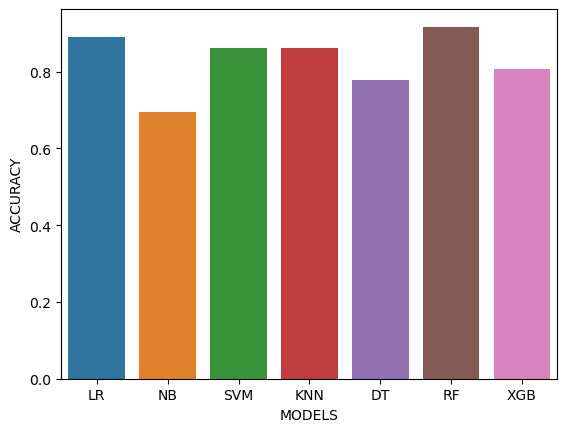

In [107]:
sns.barplot(x=final_df1['MODELS'],y=final_df1['ACCURACY'])

# Final Prediction

### Fitting THe Best Model :

In [108]:
RF = RandomForestClassifier()
RF.fit(X, Y)

RandomForestClassifier()

In [117]:
final_df.head(3)

,Rest_BP,Major_Vessels,Fasting_Blood_Sugar,Chol,Old_Peak,Sex,Age,Max_HR,Ex_Ang,Heart_Disease,ST_slop_2,ST_slop_3,Thal_normal,Thal_reversible_defect,CP_2,CP_3,CP_4,Rest_ECG_1,Rest_ECG_2
0,128,0,0,308,0.0,1,45,170,0,0,0,0,1,0,1,0,0,0,1
1,110,0,0,214,1.6,0,54,158,0,0,1,0,1,0,0,1,0,0,0
2,125,3,0,304,0.0,1,77,162,1,1,0,0,1,0,0,0,1,0,1


In [113]:
new_df = pd.DataFrame({
    'Rest_BP': 125, 
    'Major_Vessels': 3,
    'Fasting_Blood_Sugar': 0, 
    'Chol': 304, 
    'Old_Peak': 0.0,
    'Sex': 1, 
    'Age': 77, 
    'Max_HR': 162, 
    'Ex_Ang': 1, 
    'ST_slop_2': 0, 
    'ST_slop_3': 0,
    'Thal_normal': 1, 
    'Thal_reversible_defect': 0,
    'CP_2': 0, 
    'CP_3': 0, 
    'CP_4': 1,
    'Rest_ECG_1': 0,
    'Rest_ECG_2':1
},index=[0])

In [114]:
new_df

,Rest_BP,Major_Vessels,Fasting_Blood_Sugar,Chol,Old_Peak,Sex,Age,Max_HR,Ex_Ang,ST_slop_2,ST_slop_3,Thal_normal,Thal_reversible_defect,CP_2,CP_3,CP_4,Rest_ECG_1,Rest_ECG_2
0,125,3,0,304,0.0,1,77,162,1,0,0,1,0,0,0,1,0,1


In [119]:
RF.predict(new_df)

array([1], dtype=int64)

In [130]:
P = RF.predict(new_df)
if P[0]==0:
    print('No Heart Disease')
else:
    print('Heart Disease')

Heart Disease
